## Convolutional neural network
#### CNN to distinguish sunglasses from smartphones by taking pictures with a webcam
#### 13th of June 2022

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import backend as K

2022-06-21 23:50:02.673654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 23:50:02.673717: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
classes = os.listdir('../../data')
classes

['phones', 'sunglasses']

In [3]:
data_gen = keras.preprocessing.image.ImageDataGenerator(
preprocessing_function=keras.applications.mobilenet_v2.preprocess_input)

In [6]:
train_data_generator= data_gen.flow_from_directory( directory = '../../data',
class_mode = "categorical",
classes =classes,
                                                   
batch_size = 172,
target_size = (224, 224))

Found 172 images belonging to 2 classes.


In [7]:
# load everything in once

x_train, y_train = next(train_data_generator)
x_train.shape

(172, 224, 224, 3)

In [8]:
base_model = keras.applications.mobilenet_v2.MobileNetV2(
    weights= "imagenet",   
    alpha = 0.35,
    include_top=False,  # we only want to have the base, not the final dense layers 
    input_shape=(224, 224, 3)
)


2022-06-21 23:50:53.658370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-21 23:50:53.658442: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-21 23:50:53.658505: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jens-B9440UA): /proc/driver/nvidia/version does not exist
2022-06-21 23:50:53.661646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
base_model.trainable = False

In [10]:
base_model.summary()

Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 48)   0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 48)   0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 48)  432         ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 48)  192         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 144)  3456        ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 144)  576        ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 144)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 144)  1296       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 144)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 32)   4608        ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 32)  128         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 192)  6144        ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 336)   3024        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 336)   1344        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 336)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 56)     18816       ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [11]:
model = keras.Sequential()

In [12]:
model.add(base_model)

In [13]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_0.35_224 (Funct  (None, 7, 7, 1280)       410208    
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1)                 62721     
                                                                 
Total params: 472,929
Trainable params: 62,721
Non-trainable params: 410,208
_________________________________________________________________


In [15]:
K.clear_session()

In [16]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=[keras.metrics.categorical_accuracy])

# observe the validation loss and stop when it does not improve after 4 iterations
callback = keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=5)


In [17]:
y_train = y_train.reshape((-1,1))

In [18]:
y_train[0]

array([0.], dtype=float32)

In [19]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [20]:
model.fit(x_train, y_train, 
          epochs=50, 
          verbose=2,
          #callbacks = [callback],
          batch_size=len(x_train),
          shuffle =True,
          # use 30% of the data for validation
          validation_split=0.3)

2022-06-21 23:51:34.564294: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 72253440 exceeds 10% of free system memory.
/home/jens/anaconda3/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50


2022-06-21 23:51:35.213619: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 72253440 exceeds 10% of free system memory.
2022-06-21 23:51:35.213940: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 72253440 exceeds 10% of free system memory.
2022-06-21 23:51:35.231789: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 72253440 exceeds 10% of free system memory.
2022-06-21 23:51:35.232279: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 72253440 exceeds 10% of free system memory.


1/1 - 77s - loss: 1.0639 - categorical_accuracy: 1.0000 - val_loss: 2.0019 - val_categorical_accuracy: 1.0000 - 77s/epoch - 77s/step
Epoch 2/50
1/1 - 5s - loss: 1.1626 - categorical_accuracy: 1.0000 - val_loss: 2.9475 - val_categorical_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 3/50
1/1 - 5s - loss: 1.2413 - categorical_accuracy: 1.0000 - val_loss: 2.3292 - val_categorical_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 4/50
1/1 - 5s - loss: 0.5871 - categorical_accuracy: 1.0000 - val_loss: 1.2144 - val_categorical_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 5/50
1/1 - 5s - loss: 0.0981 - categorical_accuracy: 1.0000 - val_loss: 1.9263 - val_categorical_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 6/50
1/1 - 6s - loss: 0.2065 - categorical_accuracy: 1.0000 - val_loss: 2.4343 - val_categorical_accuracy: 1.0000 - 6s/epoch - 6s/step
Epoch 7/50
1/1 - 5s - loss: 0.2590 - categorical_accuracy: 1.0000 - val_loss: 2.2446 - val_categorical_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 8/50
1/1 - 5s -

In [21]:
model.save('../models/glasses_phone_model.h5')

In [22]:
pic = keras.preprocessing.image.load_img('../../test/test1.jpg', target_size=(224,224))

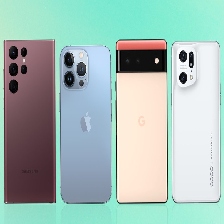

In [23]:
pic

In [24]:
pic_array = keras.preprocessing.image.img_to_array(pic)
pic_array

array([[[179., 234., 205.],
        [180., 235., 206.],
        [180., 235., 206.],
        ...,
        [168., 240., 216.],
        [166., 241., 220.],
        [165., 242., 222.]],

       [[180., 235., 206.],
        [181., 236., 207.],
        [179., 234., 205.],
        ...,
        [169., 241., 217.],
        [164., 239., 216.],
        [164., 242., 220.]],

       [[179., 235., 208.],
        [176., 232., 205.],
        [179., 235., 208.],
        ...,
        [168., 242., 217.],
        [167., 241., 218.],
        [165., 240., 219.]],

       ...,

       [[158., 236., 214.],
        [158., 236., 214.],
        [159., 237., 215.],
        ...,
        [177., 245., 224.],
        [177., 245., 224.],
        [179., 242., 223.]],

       [[156., 237., 218.],
        [160., 237., 219.],
        [158., 235., 217.],
        ...,
        [181., 244., 225.],
        [180., 243., 224.],
        [178., 243., 223.]],

       [[154., 235., 216.],
        [159., 236., 218.],
        [158., 2

In [25]:
image_batch = np.expand_dims(pic_array, axis=0)

In [26]:
processed_image = keras.applications.mobilenet_v2.preprocess_input(image_batch)

In [27]:
np.round(model.predict(processed_image), 5)

1/1 [==============================] - 0s 105ms/step


array([[0.00125]], dtype=float32)

In [29]:
import sys
import logging
import os
import cv2
from utils import write_image, key_action, init_cam



if __name__ == "__main__":

    # folder to write images to
    out_folder = sys.argv[1]

    # maybe you need this
    os.environ['KMP_DUPLICATE_LIB_OK']='True'

    logging.getLogger().setLevel(logging.INFO)
   
    # also try out this resolution: 640 x 360
    webcam = init_cam(640, 480)
    key = None

    try:
        # q key not pressed 
        while key != 'q':
            # Capture frame-by-frame
            ret, frame = webcam.read()
            # fliping the image 
            frame = cv2.flip(frame, 1)
   
            # draw a [224x224] rectangle into the frame, leave some space for the black border 
            offset = 2
            width = 224
            x = 160
            y = 120
            cv2.rectangle(img=frame, 
                          pt1=(x-offset,y-offset), 
                          pt2=(x+width+offset, y+width+offset), 
                          color=(0, 0, 0), 
                          thickness=2
            )     
            
            # get key event
            key = key_action()
            
            if key == 'space':
                # write the image without overlay
                # extract the [224x224] rectangle out of it
                image = frame[y:y+width, x:x+width, :]
                # reverse color channels
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image_array = keras.preprocessing.image.img_to_array(image)
                image_batch = np.expand_dims(image_array, axis=0)
                processed_image = keras.applications.mobilenet_v2.preprocess_input(image_batch)
                a= np.round(model.predict(processed_image), 5)
                print(a)
                if a > 0.5:
                    print(f"It's a phone, I guess. Probability: {a}")
                elif a == 0.5:
                    print("I don't know what this is")
                else:
                    print(f"It's sunglasses, I guess. Probability: {a}")

            # disable ugly toolbar
            cv2.namedWindow('frame', flags=cv2.WINDOW_GUI_NORMAL)              
            
            # display the resulting frame
            cv2.imshow('frame', frame)            
            
    finally:
        # when everything done, release the capture
        logging.info('quit webcam')
        webcam.release()
        cv2.destroyAllWindows()


INFO:root:start web cam


1/1 [==============================] - 0s 129ms/step
[[0.99819]]
It's a phone, I guess. Probability: [[0.99819]]
1/1 [==============================] - 0s 143ms/step
[[0.03833]]
It's sunglasses, I guess. Probability: [[0.03833]]
1/1 [==============================] - 0s 145ms/step
[[0.09187]]
It's sunglasses, I guess. Probability: [[0.09187]]
1/1 [==============================] - 0s 139ms/step
[[0.99217]]
It's a phone, I guess. Probability: [[0.99217]]
1/1 [==============================] - 0s 150ms/step
[[0.90724]]
It's a phone, I guess. Probability: [[0.90724]]
1/1 [==============================] - 0s 139ms/step
[[3.e-05]]
It's sunglasses, I guess. Probability: [[3.e-05]]


INFO:root:quit webcam
